# Tugas 1 Convolutional Neural Network Milestone A
- 13520116 Mahesa Lizardy
- 13520146 Bryan Amirul Husna

In [57]:
# preprocess images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
img_height, img_width = 256, 256
input_shape = (img_height, img_width, 3)


def create_data_sparse():
    data_gen = ImageDataGenerator(rescale = 1/255., validation_split = 0.2)

    data_images = data_gen.flow_from_directory('Dataset/PandasBears/Train', 
                                                target_size=(img_height, img_width),
                                                class_mode='binary', 
                                                batch_size=200, # mengecilkan size untuk test
                                                subset='training', 
                                                # color_mode='rgb'
                                                )

    return data_images

data_images = create_data_sparse()

labels = ['bear', 'panda']

Found 400 images belonging to 2 classes.


In [48]:
from sklearn.model_selection import train_test_split
X, y = data_images.next()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(f"size X_train = {len(X_train)}")
print(f"size X_test = {len(X_test)}")

size X_train = 180
size X_test = 20


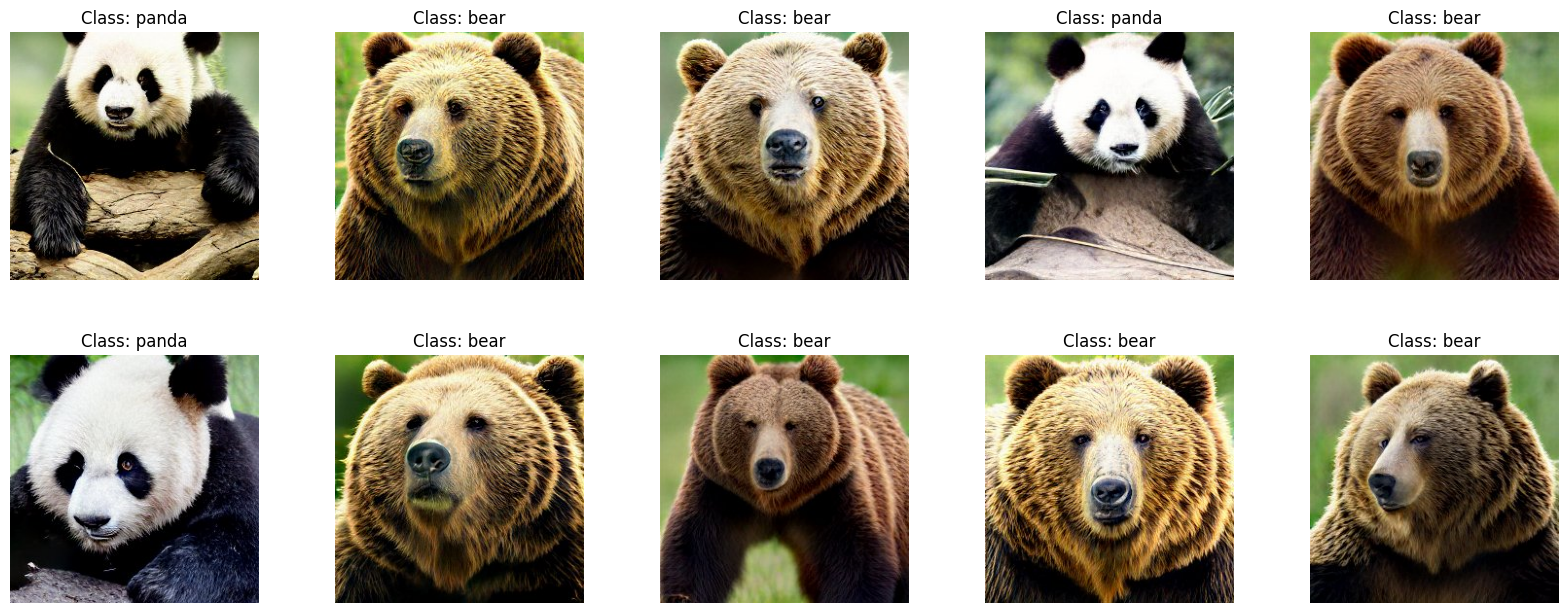

In [28]:
plt.figure(figsize = (20,20))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3,wspace=0.3)
    plt.imshow(X_train[i])
    plt.title(f"Class: {labels[int(y_train[i])]}")
    plt.axis('off')


In [20]:
# import from src
from src.Model import Model
from src.Convolution import Convolution
from src.Dense import Dense
from src.Pooling import Pooling
from src.Flatten import Flatten

In [24]:
# Buat model, dengan weights bernilai random
input_shape = X_train[0].shape

model = Model()
model.add(Convolution(input_size=input_shape, padding_size=1, filter_size=(3, 3), num_filters=2, stride=1, bias=0))
model.add(Pooling(filter_size = (32,32), stride=32, mode='max'))
model.add(Flatten())
model.add(Dense(num_units=7, activation_function="relu"))
model.add(Dense(num_units=1, activation_function="sigmoid"))

In [ ]:
# Prediksi
y_p = model.predict(X_test[0:5])
print(y_p)

In [11]:
# Kesimpulan prediksi
y_predicted = np.array([0. if y < 0.5 else 1. for y in y_p])
print("Actual y:", y_test[:5])
print("Predicted y:", y_predicted)

Actual y: [0. 0. 0. 0. 0.]
Predicted y: [0. 0. 0. 0. 0.]


In [12]:
# Perbandingan dengan Keras
# Bobot model (layer 0 (convolution), 3 (dense), dan 4 (dense))
# Konversi weights filter ke formatnya keras
l0_filters = model.layers[0].filter
f = len(l0_filters)
h = len(l0_filters[0])
w = len(l0_filters[0][0])
d = len(l0_filters[0][0][0])

r = []
for i in range(h):
    r.append([])
    for j in range(w):
        r[i].append([])
        for k in range(d):
            r[i][j].append([])
            for l in range(f):
                r[i][j][k].append(l0_filters[l][i][j][k])
l0_weights = np.array(r)
l0_bias = model.layers[0].bias

# Weights untuk dense sudah compatible dengan formatnya keras
l3_weights = model.layers[3].weights
l3_bias = model.layers[3].bias
l4_weights = model.layers[4].weights
l4_bias = model.layers[4].bias

In [59]:
# Perbandingan dengan Keras
import tensorflow.keras as keras

In [66]:
# Define the model architecture
model_k = keras.models.Sequential()
model_k.add(keras.layers.Conv2D(filters=2, kernel_size=(3, 3), activation="relu", strides=(1,1), padding="same", input_shape=input_shape))
model_k.add(keras.layers.MaxPooling2D(pool_size=(32,32), strides=32))
model_k.add(keras.layers.Flatten())
model_k.add(keras.layers.Dense(units=7, activation="relu"))
model_k.add(keras.layers.Dense(units=1, activation="sigmoid"))
        
model_k.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# model_k.layers[0].set_weights([l0_weights, l0_bias])
# model_k.layers[3].set_weights([l3_weights, l3_bias])
# model_k.layers[4].set_weights([l4_weights, l4_bias])

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/2
5/5 [==============================] - 1s 110ms/step - loss: 0.6935 - accuracy: 0.4722
Epoch 2/2
5/5 [==============================] - 1s 112ms/step - loss: 0.6931 - accuracy: 0.5111


AttributeError: 'Model' object has no attribute 'metrics_names'

In [67]:
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True)
acc_per_fold = []
loss_per_fold = []

In [68]:
# Merge inputs and targets
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)
print(len(inputs))
print(len(targets))
inputs

200
200


array([[[[2.64513656e-03, 3.13725509e-03, 1.61476363e-03],
         [2.46059219e-03, 2.95271073e-03, 1.43021916e-03],
         [2.35294132e-03, 2.89119571e-03, 1.35332567e-03],
         ...,
         [1.32256828e-03, 1.73779333e-03, 6.76662836e-04],
         [1.27643219e-03, 1.67627854e-03, 6.76662836e-04],
         [1.29181088e-03, 1.69165723e-03, 6.92041533e-04]],

        [[2.53748568e-03, 3.02960421e-03, 1.50711276e-03],
         [2.36832001e-03, 2.90657440e-03, 1.36870437e-03],
         [2.33756262e-03, 2.87581701e-03, 1.33794697e-03],
         ...,
         [1.35332567e-03, 1.76855072e-03, 7.07420229e-04],
         [1.30718958e-03, 1.70703593e-03, 7.07420229e-04],
         [1.30718958e-03, 1.70703593e-03, 7.07420229e-04]],

        [[2.41445610e-03, 2.93733180e-03, 1.44559785e-03],
         [2.30680523e-03, 2.82968092e-03, 1.33794697e-03],
         [2.32218392e-03, 2.84505961e-03, 1.35332567e-03],
         ...,
         [1.30718958e-03, 1.76855072e-03, 6.92041533e-04],
         [

In [70]:
# K-fold Cross Validation model evaluation
fold_no = 1

for train, test in kfold.split(inputs, targets):
     # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model_k.fit(inputs[train], targets[train],
                batch_size=40,
                epochs=2)
     # Generate generalization metrics

    scores = model_k.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model_k.metrics_names[0]} of {scores[0]}; {model_k.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/2
5/5 [==============================] - 1s 121ms/step - loss: 0.6927 - accuracy: 0.5222
Epoch 2/2
5/5 [==============================] - 1s 120ms/step - loss: 0.6925 - accuracy: 0.5222
Score for fold 1: loss of 0.6956824064254761; accuracy of 30.000001192092896%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/2
5/5 [==============================] - 1s 117ms/step - loss: 0.6929 - accuracy: 0.4889
Epoch 2/2
5/5 [==============================] - 1s 117ms/step - loss: 0.6929 - accuracy: 0.4889
Score for fold 2: loss of 0.6906557083129883; accuracy of 60.00000238418579%
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/2
5/5 [==============================] - 1s 108ms/step - loss: 0.6926 - accuracy: 0.4944
Epoch 2/2
5/5 [==============================] - 1s 112ms/step - loss

In [71]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score 10-fold cross Validation')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f' Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.6956824064254761 - Accuracy: 30.000001192092896%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.6906557083129883 - Accuracy: 60.00000238418579%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.6912631392478943 - Accuracy: 55.000001192092896%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.6911283731460571 - Accuracy: 55.000001192092896%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.6922591328620911 - Accuracy: 44.999998807907104%
------------------------------------------------------------------------
> Fold 6 - Loss: 0.6919049024581909 - Accuracy: 44.999998807907104%
-------------------------------------------------------------------

In [15]:
model_k.predict(X_test[:5])

1/1 [==============================] - 0s 282ms/step


array([[9.8936133e-22],
       [2.4778244e-19],
       [9.9278862e-18],
       [5.1166306e-22],
       [1.7330027e-20]], dtype=float32)